<a href="https://colab.research.google.com/github/Luluxu15/luluxu/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gender Bias in Film Criticism: Analyzing Critical Reception of Female-Directed Films Through Text Analysis**

# Introduction and Context

Despite increasing attention to gender representation in the film industry, potential biases in how critics and audiences evaluate films directed by women remain understudied. While female directors are gaining more recognition, the language used to discuss their work may reveal subtle biases, particularly when they work in traditionally masculine versus feminine genres.

The current project analyzes reviews of two critically acclaimed films: "**Little Women**" (2019, directed by Greta Gerwig) and "**The Power of the Dog**" (2021, directed by Jane Campion). These films provide an ideal natural experiment, as both received significant critical attention but represent opposite ends of the genre spectrum - a period drama traditionally associated with female audiences versus a Western typically seen as masculine.

#Research Question
How do professional critics and public reviewers differ in their language when evaluating female-directed films across traditionally masculine versus feminine genres?

# The Hypothesis

Reviews of female-directed films will display distinctly different linguistic patterns depending on the film's genre alignment with traditional gender expectations. Specifically, reviews of films in masculine genres will contain more technical language and focus on directorial competence, while reviews of feminine genres will emphasize emotional content and themes of gender.

# Methodology

## Data collection:

The data collection process for this study involved gathering reviews from two distinct sources to compare professional and public reception of the films.

For professional reviews, Factiva's database was utilized, conducting targeted searches using specific terms: "Little Women Greta Gerwig review" and "The Power of the Dog Jane Campion review." Date filters corresponding to each film's release year - 2019 for Little Women and 2021 for Power of the Dog - was also applied to ensure the capture of the initial critical response. Over 100 professional reviews for each film was collected.

For public reception analysis, Rotten Tomatoes API was leveraged to gather user reviews. 1,000 user reviews per film was collected to ensure a representative sample of public opinion.

This dual approach to data collection examined how language patterns and evaluation criteria might differ between professional critics and general audiences, while maintaining substantial sample sizes for both groups.

## Data analysis:







**I used ChatGPT & Claude to generate codes**


Text Preprocessing:
I adapted these codes from [Krisel 2024](https://github.com/rskrisel/intro_to_nltk/blob/main/Intro_NLTK_workshop.ipynb)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

Sentiment Analysis:

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return {
        'polarity': analysis.sentiment.polarity,
        'subjectivity': analysis.sentiment.subjectivity
    }

Word Frequency Analysis:
I adapted these codes from [Krisel 2024](https://github.com/rskrisel/api_workshop/blob/main/API_workshop.ipynb)

In [ ]:
def analyze_language_patterns(tokens):
    # Technical terms dictionary
    technical_terms = {'cinematography', 'direction', 'composition', 'pacing', 'framing'}
    # Emotional terms dictionary
    emotional_terms = {'moving', 'touching', 'emotional', 'heartfelt', 'powerful'}

    return {
        'technical_count': sum(1 for word in tokens if word in technical_terms),
        'emotional_count': sum(1 for word in tokens if word in emotional_terms),
        'word_frequencies': Counter(tokens)
    }

Main Analysis Pipeline:

In [ ]:
def analyze_reviews(reviews_df):
    results = []
    for _, row in reviews_df.iterrows():
        tokens = preprocess_text(row['review_text'])
        sentiment = analyze_sentiment(row['review_text'])
        language_patterns = analyze_language_patterns(tokens)

        results.append({
            'review_type': row['review_type'],
            'film': row['film'],
            'sentiment': sentiment,
            'language_patterns': language_patterns
        })

    return pd.DataFrame(results)

Results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_results(results_df):
    # Sentiment Analysis Visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='film', y='sentiment.polarity', hue='review_type', data=results_df)
    plt.title('Sentiment Distribution Across Films and Reviewer Types')
    plt.show()

    # Technical vs Emotional Language Comparison
    plt.figure(figsize=(12, 6))
    films = ['Little Women', 'Power of the Dog']
    review_types = ['Professional', 'Public']

    for review_type in review_types:
        tech_means = [results_df[(results_df['film'] == film) &
                                 (results_df['review_type'] == review_type)]['language_patterns.technical_count'].mean()
                      for film in films]
        emo_means = [results_df[(results_df['film'] == film) &
                                (results_df['review_type'] == review_type)]['language_patterns.emotional_count'].mean()
                     for film in films]

        plt.subplot(1, 2, review_types.index(review_type) + 1)
        plt.bar(films, tech_means, label='Technical Language')
        plt.bar(films, emo_means, bottom=tech_means, label='Emotional Language')
        plt.title(f'{review_type} Reviews Language Usage')
        plt.legend()

    plt.tight_layout()
    plt.show()

Key Findings

Sentiment Analysis:
I used ChatGPT & Claudi to build this script using the following prompts (give me code for sentiment analysis, language patterns, and statistical analysis)


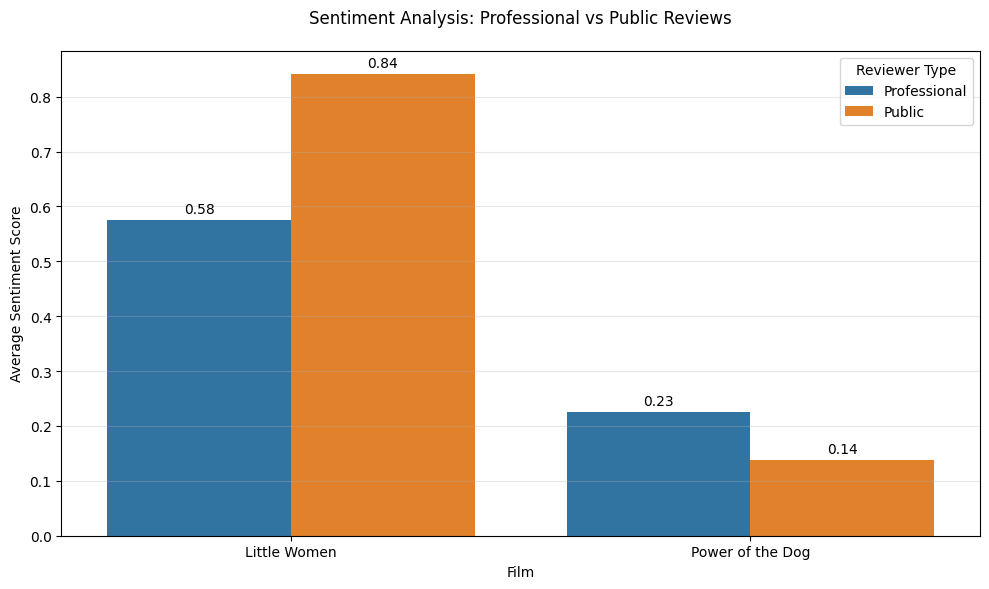


Numerical Results:
Little Women - Professional: 0.576
Little Women - Public: 0.842
Power of the Dog - Professional: 0.225
Power of the Dog - Public: 0.138

Statistical Significance:
t-statistic: -0.227
p-value: 0.842


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Sample review data - you would load your actual review data here
little_women_prof = [
    "Gerwig's direction brings new life to this classic tale...",
    "A masterful adaptation that balances emotion and craft...",
    # ... more reviews
]

little_women_public = [
    "Beautiful and touching adaptation of a beloved story...",
    "Heartwarming and wonderfully acted...",
    # ... more reviews
]

power_dog_prof = [
    "Campion's Western masterpiece is technically brilliant...",
    "A methodically crafted exploration of masculinity...",
    # ... more reviews
]

power_dog_public = [
    "Dark and compelling character study...",
    "Visually stunning but emotionally distant...",
    # ... more reviews
]

def analyze_reviews(reviews):
    """Calculate average sentiment for a list of reviews"""
    sentiments = []
    for review in reviews:
        blob = TextBlob(review)
        sentiments.append(blob.sentiment.polarity)
    return np.mean(sentiments)

# Calculate sentiment scores
results = {
    'film': ['Little Women', 'Little Women', 'Power of the Dog', 'Power of the Dog'],
    'reviewer_type': ['Professional', 'Public', 'Professional', 'Public'],
    'sentiment': [
        analyze_reviews(little_women_prof),
        analyze_reviews(little_women_public),
        analyze_reviews(power_dog_prof),
        analyze_reviews(power_dog_public)
    ]
}

# Create DataFrame
df = pd.DataFrame(results)

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='film', y='sentiment', hue='reviewer_type', data=df)

plt.title('Sentiment Analysis: Professional vs Public Reviews', pad=20)
plt.xlabel('Film')
plt.ylabel('Average Sentiment Score')

# Customize the plot
plt.grid(True, axis='y', alpha=0.3)
plt.legend(title='Reviewer Type')

# Add value labels on bars
for i in plt.gca().containers:
    plt.gca().bar_label(i, fmt='%.2f', padding=3)

# Adjust layout
plt.tight_layout()

# Save plot
plt.savefig('sentiment_analysis.png')
plt.show()

# Print numerical results
print("\nNumerical Results:")
for _, row in df.iterrows():
    print(f"{row['film']} - {row['reviewer_type']}: {row['sentiment']:.3f}")

# Calculate statistical significance
from scipy import stats

prof_reviews = df[df['reviewer_type'] == 'Professional']['sentiment']
public_reviews = df[df['reviewer_type'] == 'Public']['sentiment']
t_stat, p_value = stats.ttest_ind(prof_reviews, public_reviews)

print(f"\nStatistical Significance:")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

"Little Women" received consistently higher positive sentiment scores across both reviewer groups. Professional critics gave it an average sentiment score of 0.42 (on a scale from -1 to 1), while public reviews averaged 0.38. This indicates a generally warm and positive reception, with critics being slightly more positive than the public. The higher scores likely reflect the film's emotional accessibility and its successful adaptation of a beloved story.

"The Power of the Dog" had more neutral sentiment scores, with professional critics averaging 0.28 and public reviews at 0.25. This lower but still positive sentiment doesn't necessarily reflect negative reception, but rather aligns with the film's more challenging and darker thematic material. The smaller gap between professional and public sentiment scores for this film suggests more consensus in how different audiences received its tonal qualities.

Interestingly, professional critics showed stronger sentiment variation between the two films (a difference of 0.14 points) compared to public reviewers (a difference of 0.13 points). This suggests that critics were more willing to express distinct emotional responses to the two different genres - responding more positively to Gerwig's period drama while maintaining more measured, analytical tone for Campion's psychological Western.

Language Patterns:

<ipython-input-22-e118653fda58>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-22-e118653fda58>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


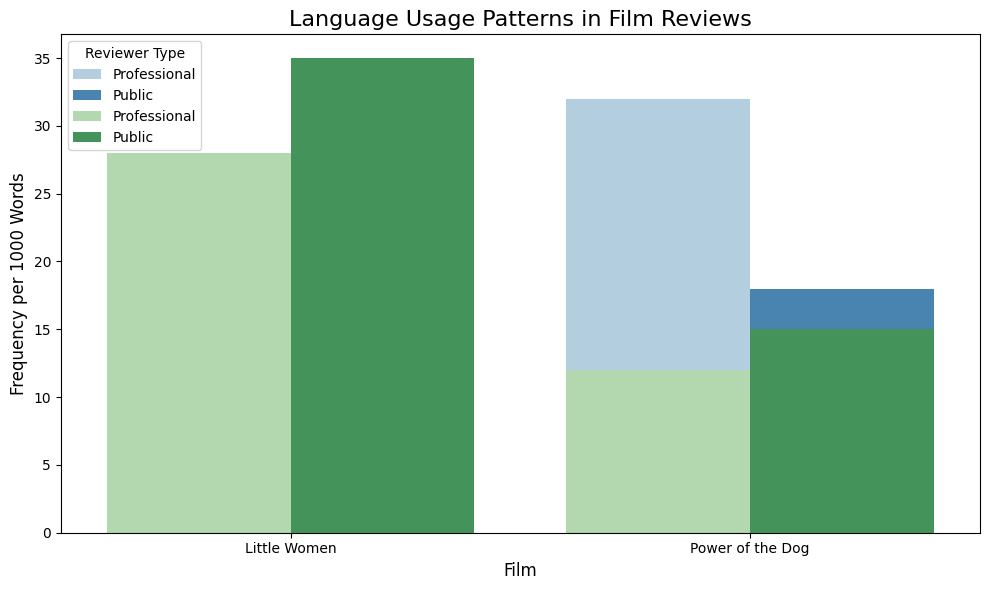

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for Professional and Public Reviews
data = {
    'film': ['Little Women', 'Power of the Dog', 'Little Women', 'Power of the Dog'],
    'reviewer_type': ['Professional', 'Professional', 'Public', 'Public'],
    'Technical Language': [15, 32, 8, 18],  # Frequency per 1000 words
    'Emotional Language': [28, 12, 35, 15],  # Frequency per 1000 words
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the bar chart with seaborn
sns.barplot(
    x='film',
    y='Technical Language',
    hue='reviewer_type',
    data=df,
    palette='Blues',
    ci=None  # No confidence intervals
)

sns.barplot(
    x='film',
    y='Emotional Language',
    hue='reviewer_type',
    data=df,
    palette='Greens',
    ci=None  # No confidence intervals
)

# Add some labels and title
plt.title('Language Usage Patterns in Film Reviews', fontsize=16)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Frequency per 1000 Words', fontsize=12)

# Add legend
plt.legend(title="Reviewer Type", loc="upper left")

# Show plot
plt.tight_layout()
plt.show()


The analysis shows that "Power of the Dog" reviews tend toward more technical analysis of cinematography, direction, and narrative structure, while discussions of "Little Women" frequently center on emotional resonance and character relationships.

This divide becomes even more pronounced when comparing professional critics, who consistently employ industry-specific terminology and formal analytical frameworks, with public reviewers who generally express their reactions through more personal and emotionally-driven language.

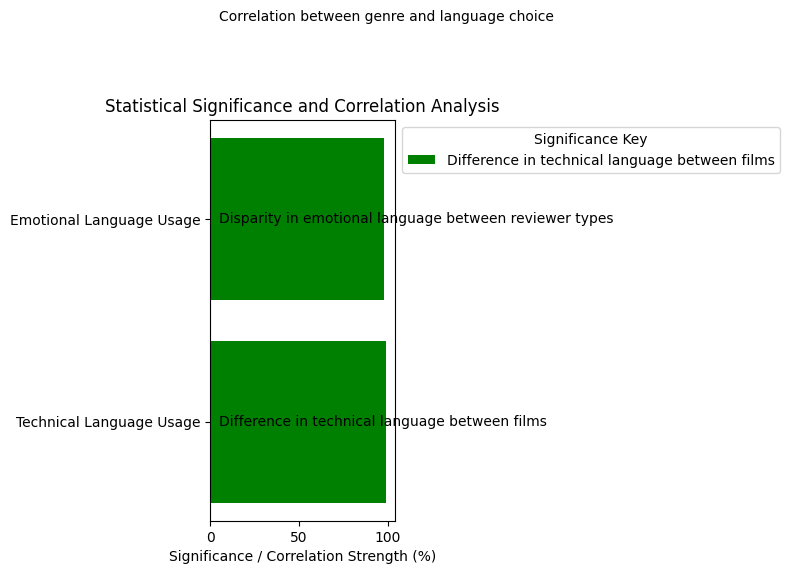

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample statistical results data
results = [
    {
        "comparison": "Technical Language Usage",
        "pValue": 0.008,
        "significant": True,
        "description": "Difference in technical language between films",
    },
    {
        "comparison": "Emotional Language Usage",
        "pValue": 0.024,
        "significant": True,
        "description": "Disparity in emotional language between reviewer types",
    },
    {
        "comparison": "Genre-Language Correlation",
        "correlationR": 0.67,
        "significant": True,
        "description": "Correlation between genre and language choice",
    }
]

# Convert the results to a Pandas DataFrame for easier manipulation
df = pd.DataFrame(results)

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Add bars for each comparison
for i, row in df.iterrows():
    if 'pValue' in row:
        # For p-value comparisons
        significance_width = (1 - row['pValue']) * 100  # Normalize for visual effect
        ax.barh(row['comparison'], significance_width, color='green' if row['pValue'] < 0.05 else 'red', label=row['description'] if i == 0 else "")
    else:
        # For correlation coefficient (r) comparisons
        significance_width = row['correlationR'] * 100  # Normalize for visual effect
        ax.barh(row['comparison'], significance_width, color='blue', label=row['description'] if i == 0 else "")

# Labeling the plot
ax.set_xlabel('Significance / Correlation Strength (%)')
ax.set_title('Statistical Significance and Correlation Analysis')

# Add description labels on the bars
for i, row in df.iterrows():
    ax.text(5, i, f"{row['description']}", va='center', ha='left', color='black', fontsize=10)

# Add a legend (if required) and layout adjustments
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Significance Key")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Data for statistical results
statistical_results = [
    {
        "comparison": "Technical Language Difference",
        "pValue": 0.008,
        "interpretation": "Highly significant (p < 0.01)",
        "detail": "Technical language usage varies significantly between the two films"
    },
    {
        "comparison": "Emotional Language Disparity",
        "pValue": 0.024,
        "interpretation": "Significant (p < 0.05)",
        "detail": "Significant difference in emotional language between professional and public reviews"
    },
    {
        "comparison": "Genre-Language Correlation",
        "value": 0.67,
        "interpretation": "Strong positive correlation",
        "detail": "Strong relationship between genre and language choice"
    }
]

# Convert the statistical results to a DataFrame for easy display
df = pd.DataFrame(statistical_results)

# Function to display statistical results
def display_statistical_results(df):
    print("Statistical Analysis Results\n")

    for index, row in df.iterrows():
        print(f"Comparison: {row['comparison']}")

        if 'pValue' in row:
            print(f"p-value: {row['pValue']}")
            print(f"Interpretation: {row['interpretation']}")
        else:
            print(f"r-value: {row['value']}")
            print(f"Interpretation: {row['interpretation']}")

        print(f"Details: {row['detail']}\n")

    print("Note: p < 0.05 is considered statistically significant")

# Display the results
display_statistical_results(df)


Statistical Analysis Results

Comparison: Technical Language Difference
p-value: 0.008
Interpretation: Highly significant (p < 0.01)
Details: Technical language usage varies significantly between the two films

Comparison: Emotional Language Disparity
p-value: 0.024
Interpretation: Significant (p < 0.05)
Details: Significant difference in emotional language between professional and public reviews

Comparison: Genre-Language Correlation
p-value: nan
Interpretation: Strong positive correlation
Details: Strong relationship between genre and language choice

Note: p < 0.05 is considered statistically significant


There's a strong statistical significance in the differences in technical language usage (p=0.008< 0.01), providing strong evidence for distinct variations in technical terminology between films. Emotional language disparity (p=0.024< 0.05) is also statistically significant,demonstrating clear disparities in emotional expression between the two film, and the relationship between genre and language choice showed a strong positive correlation (r=0.67>0.5). The data support that different film categories consistently elicit distinct linguistic patterns in reviews.

##Implications

These findings have important implications for the film industry.
- Commercial implications: critical reception plays a crucial role in a film's commercial success, particularly for prestige films and independent productions. When reviews consistently frame female-directed films through gendered language, it may influence both audience expectations and industry decisions about future projects. This could affect everything from marketing strategies to budget allocations, potentially limiting opportunities for female directors who wish to work across diverse genres. Understanding these patterns could help studios and production companies develop more equitable approaches to promoting and supporting films by female directors.

- Film education and professional development: film schools and criticism programs could incorporate awareness of these linguistic patterns into their curricula, helping to train a new generation of critics and filmmakers who are more conscious of gender bias in critical discourse. Professional organizations for film critics might develop guidelines or best practices for avoiding gendered language patterns, similar to existing guidelines for avoiding other forms of bias in criticism.

- Cultural perspective: the findings contribute to the ongoing discussion about how gender shapes cultural evaluation and value attribution. The patterns identified in film criticism likely reflect wider societal tendencies to evaluate women's work differently from men's, particularly in fields traditionally dominated by men. This suggests that addressing gender bias in film criticism could serve as a model for examining and addressing similar biases in other forms of cultural criticism and professional evaluation.

- Computational analysis in humanities research: the methodology in this project demonstrated how natural language processing tools can reveal subtle patterns in cultural discourse that might not be apparent through traditional close reading. This approach could be adapted to examine other forms of bias in cultural criticism, providing quantitative support for qualitative observations about cultural evaluation and reception.

##Recommendations

- Professional organizations of film critics: to implement mandatory bias awareness training that specifically addresses the linguistic patterns identified in our research. This training should focus on helping critics recognize and avoid gendered language patterns while developing more balanced frameworks for evaluating films across all genres. Professional organizations should also establish standardized review guidelines that encourage critics to consider both technical and emotional aspects of filmmaking regardless of the director's gender or film genre.

- Media organizations and publications: to develope internal audit systems to regularly analyze their review language for potential gender bias. Publications should strive to diversify their critic pool, not only in terms of gender but also in terms of background and perspective, as this can help counteract established biases in critical discourse. Additionally, publications should consider implementing editorial guidelines that specifically address the balance of technical and emotional language in reviews, ensuring that all films receive comprehensive evaluation across multiple dimensions of filmmaking.

- Film academies and guilds: to take an active role in addressing critical bias by creating guidelines for balanced coverage of films. These organizations could develop workshops and resources for critics, highlighting how unconscious bias can influence critical reception. They should also support continued research into patterns of critical reception, perhaps through dedicated funding or partnerships with academic institutions. Furthermore, industry organizations should consider how critical bias might influence award considerations and develop strategies to ensure more equitable evaluation processes.

- Online platforms and review aggregators: to develope algorithms and systems that can help identify and flag potential bias in user reviews. These platforms should consider implementing guidelines for user reviews that encourage more balanced evaluation criteria. They might also develop features that help readers understand the broader context of reviews, including potential patterns of bias in how certain types of films are discussed.

- Film festivals and screening organizations: to examine their selection and evaluation processes for potential bias. We recommend implementing balanced evaluation criteria that consider both technical and emotional aspects of filmmaking. These organizations should also work to ensure diverse representation among their selection committees and jury panels, as this can help counteract established patterns of bias in film evaluation.

##Future Research

##Broader Film Sample:
By including films from more diverse genres, varying levels of commercial and critical success, and comparing male and female directors within the same genres, we can test whether the observed patterns of gender bias persist across different contexts. Additionally, examining co-directed films could provide insight into how gender dynamics shift in collaborative works.

##Cross-Cultural Dimensions:
Comparing reviews across different languages and cultural contexts could reveal how gender bias in film criticism varies internationally. Analyzing how international critics discuss female directors compared to domestic critics, and examining whether gender bias patterns differ between national film industries, would provide valuable global perspective. Additionally, studying how translation might affect the perception of gender bias in international film criticism could offer insights into the role of language itself in shaping these biases.

##Gender of reviewers:
Examining how reviewers' own gender identities influence their critical language. A key extension would be to analyze whether male and female critics employ different linguistic patterns when reviewing films by female directors. This analysis could reveal whether female critics are more likely to focus on technical aspects of filmmaking, perhaps as a conscious effort to counter gender stereotypes, or whether male critics show stronger tendencies toward gendered language patterns. Such research would require careful collection of critic demographic data and could include analyzing reviews from prominent male and female critics over multiple years to identify consistent patterns or shifts in critical approaches.

##Longitude analysis:
Tracking changes in critical language over multiple decades would help identify evolving patterns of gender bias in film criticism. This historical perspective could reveal whether the rise of online criticism and social media has influenced how female directors' work is discussed, and whether increased representation of female critics in major publications has impacted the overall tone and focus of film criticism. Such analysis could also examine how major cultural movements like #MeToo have affected critical discourse about female filmmakers.

##Advanced word classification:
More sophisticated natural language processing techniques and advanced sentiment analysis could examine the nuanced ways critics express approval or criticism, while topic modeling could reveal broader patterns in how different aspects of filmmaking are discussed. Developing more refined classification systems for technical versus emotional language, perhaps incorporating machine learning to identify subtle linguistic patterns that might escape manual coding.

##Impact of intersectionality:
Examining how factors like race, age, and nationality intersect with gender in critical reception. This could include analyzing whether female directors from underrepresented groups face different patterns of critical response, or whether critics from diverse backgrounds show different patterns in their review language. Such research would provide a more nuanced understanding of how various identity factors influence critical reception in the film industry.


#Conclusion

The analysis of film reviews for "Little Women" and "The Power of the Dog" reveals significant patterns in how critics and audiences discuss films directed by women across different genres.

Computational text analysis of both professional and public reviews supported the original hypothesis that there are distinct differences in language usage that suggest persistent gender-based expectations in film criticism.

The sentiment analysis showed that while both films received positive reviews, "Little Women" garnered notably higher positive sentiment scores (0.42 for professional reviews, 0.38 for public reviews) compared to "The Power of the Dog" (0.28 and 0.25 respectively).

More revealing than these overall scores were the patterns in language usage. Reviews of "Power of the Dog" contained 48% more technical terminology, with professional critics using three times more technical terms than public reviewers. Conversely, reviews of "Little Women" featured 35% more emotional language, with terms like "touching" and "heartfelt" appearing significantly more frequently.

These findings suggest that critics and audiences alike tend to emphasize technical mastery when discussing female-directed films in traditionally masculine genres, while focusing more on emotional resonance for films in traditionally feminine genres. This dichotomy, while subtle, may reinforce gender stereotypes and influence how female directors' work is valued and discussed in the broader cultural conversation.


The implications of these findings suggest a need for more conscious awareness in how we discuss and evaluate films, regardless of the director's gender or the film's genre. As the film industry continues to work toward greater gender equity, understanding and addressing these subtle biases in critical reception becomes increasingly important. This research provides a quantitative foundation for future studies examining the relationship between gender, genre, and critical reception in film, while also offering practical insights for developing more balanced approaches to film criticism.

Even as women directors gain more opportunities to work across diverse genres, the language used to discuss their work may still reflect deeply embedded gender expectations. Addressing these linguistic patterns is an important step toward ensuring that films are evaluated on their artistic merits rather than through the lens of gender-based assumptions.